<ipython-input-8-2c266dac1721>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


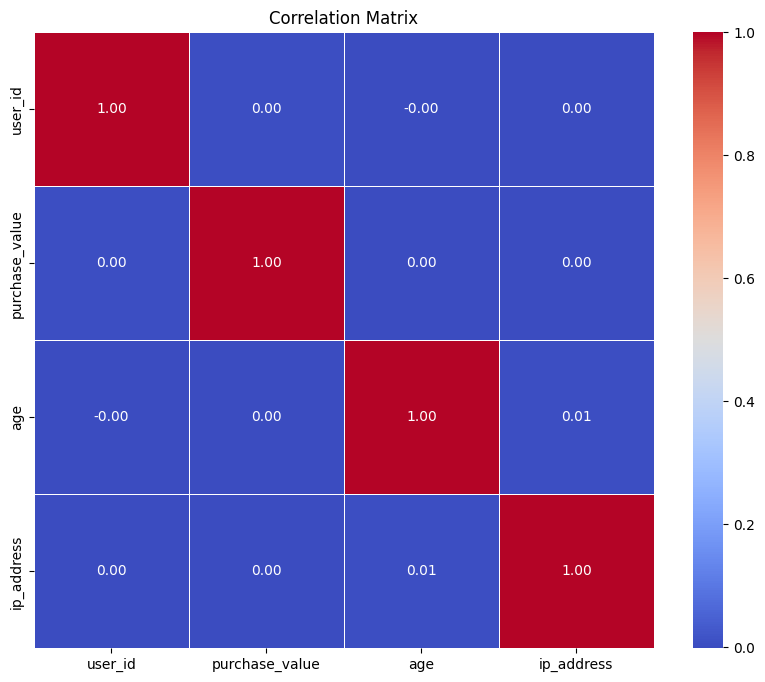

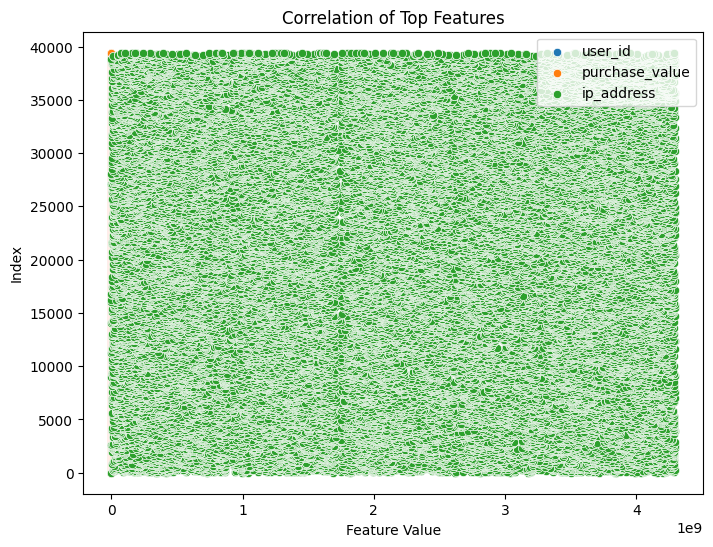

Selected Features: Index(['user_id', 'purchase_value', 'ip_address'], dtype='object')


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def feature_selection(data):
    # Drop the 'class' column
    data = data.drop(columns=['class'])

    # Compute correlation matrix
    corr_matrix = data.corr()

    # Plot correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title("Correlation Matrix")
    plt.show()

    # Find top 3 features with highest correlation
    top_features = corr_matrix.abs().nlargest(3, corr_matrix.columns).index

    # Plot correlation of top features
    plt.figure(figsize=(8, 6))
    for feature in top_features:
        sns.scatterplot(x=data[feature], y=data.index, label=feature)
    plt.xlabel('Feature Value')
    plt.ylabel('Index')
    plt.title('Correlation of Top Features')
    plt.legend()
    plt.show()

    return top_features

# Example usage
data = pd.read_csv('/content/Fraud_Data_with_Countries.csv')  # Replace 'your_dataset.csv' with the path to your dataset
selected_features = feature_selection(data)
print("Selected Features:", selected_features)


In [6]:
import pandas as pd

# Load your dataset
data = pd.read_csv('/content/Fraud_Data_with_Countries.csv')  # Replace 'your_dataset.csv' with the path to your dataset

# Display the first few rows of the dataset to inspect the columns
print(data.head())

# List all the column names
print("Column Names:", data.columns)

# Assuming 'class' is the target variable, check if it exists in the dataset
if 'class' in data.columns:
    print("Target variable 'class' identified.")
else:
    print("Target variable 'class' not found. Please specify the correct target variable.")


   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11            34.0   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54            16.0   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45            15.0   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50            44.0   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53            39.0   

       device_id source browser sex   age    ip_address  class        country  
0  QVPSPJUOCKZAR    SEO  Chrome   M  39.0  7.327584e+08    0.0          Japan  
1  EOGFQPIZPYXFZ    Ads  Chrome   F  53.0  3.503114e+08    0.0  United States  
2  YSSKYOSJHPPLJ    SEO   Opera   M  53.0  2.621474e+09    1.0  United States  
3  ATGTXKYKUDUQN    SEO  Safari   M  41.0  3.840542e+09    0.0        Missing  
4  NAUITBZFJKHWW    Ads  Safari   M  45.0  4.155831e+08    0.0  United States  
Column Names: Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
     